In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import cugraph
import cudf

In [2]:
df = cudf.read_csv('network_files/network.tsv', delimiter='\t')
G = cugraph.Graph(directed=True)
G.from_cudf_edgelist(df, source='source', destination='target')

G_ud = cugraph.Graph(directed=False)
G_ud.from_cudf_edgelist(df, source='source', destination='target')

/pfs/data5/home/tu/tu_tu/tu_kmpaj01/miniforge3/envs/cugraph/lib/python3.11/site-packages/cugraph/structure/symmetrize.py:92: FutureWarning: Multi is deprecated and the removal of multi edges will no longer be supported from 'symmetrize'. Multi edges will be removed upon creation of graph instance.
  warnings.warn(
/pfs/data5/home/tu/tu_tu/tu_kmpaj01/miniforge3/envs/cugraph/lib/python3.11/site-packages/cugraph/structure/symmetrize.py:92: FutureWarning: Multi is deprecated and the removal of multi edges will no longer be supported from 'symmetrize'. Multi edges will be removed upon creation of graph instance.
  warnings.warn(


### Centrality

In [3]:
vertex_bc = cugraph.betweenness_centrality(G)

In [4]:
edge_bc = cugraph.edge_betweenness_centrality(G)

In [5]:
vertex_bc.sort_values(by='betweenness_centrality', ascending=False).head(10)

,betweenness_centrality,vertex
21346,0.004014,t__468063
21347,0.003884,t__58098
21344,0.003652,t__415428
21352,0.003459,t__66540
21359,0.002718,t__31928
8727,0.001933,ampicillin
22079,0.001563,vancomycin
21345,0.001562,t__12278
15672,0.001561,t__48542
15673,0.001327,t__31906


In [6]:
edge_bc.sort_values(by='betweenness_centrality', ascending=False).head(10)

,betweenness_centrality,src,dst
447596,0.000499,rhamnolipid,t__61831
459149,0.000455,non,t__47119
333712,0.000451,antimicrobial,t__415428
307184,0.000385,nacl,t__57630
110710,0.000381,ampicillin,t__68697
125621,0.000355,vancomycin,t__12278
494709,0.000335,siderophore,t__58098
333713,0.000331,antimicrobial,t__468063
496471,0.000327,edna,t__94811
456597,0.000313,iaa,t__231024


In [7]:
cugraph.centrality.eigenvector_centrality(G).sort_values("eigenvector_centrality", ascending=False).head(10)

/pfs/data5/home/tu/tu_tu/tu_kmpaj01/miniforge3/envs/cugraph/lib/python3.11/site-packages/cugraph/centrality/eigenvector_centrality.py:88: UserWarning: Eigenvector centrality expects the 'store_transposed' flag to be set to 'True' for optimal performance during the graph creation
  warnings.warn(warning_msg, UserWarning)


,eigenvector_centrality,vertex
19373,0.138019,t__66540
14128,0.130701,biofilm
14565,0.109358,t__31928
14132,0.108764,gram
14131,0.103606,gram - negative
14129,0.103556,lb
14136,0.102176,tsb
14134,0.100844,mouse
4445,0.098547,t__58098
14137,0.096572,pathogenic


### Community

In [8]:
df, mod = cugraph.louvain(G_ud)

In [9]:
df_l, mod_l = cugraph.leiden(G_ud) 

In [10]:
print('Louvain Modularity was {}'.format(mod))
print()

Louvain Modularity was 0.6127640008926392



In [11]:
print('Leiden Modularity was {}'.format(mod_l))
print()

Leiden Modularity was 0.6153292059898376



In [13]:
df = cugraph.weakly_connected_components(G_ud)
df.head(20)

,labels,vertex
0,194374,t__235600
1,194374,ufas
2,194374,neutralized
3,194374,freshwater spring
4,194374,t__329551
5,194374,t__320905
6,194374,t__304309
7,194374,t__271581
8,194374,t__230264
9,194374,brewing environment


In [3]:
df = cugraph.strongly_connected_components(G_ud)
df.head(20)

MemoryError: std::bad_alloc: cudaErrorMemoryAllocation: out of memory

In [15]:
label_gby = df.groupby('labels')
label_count = label_gby.count()
print("Total number of components found : ", len(label_count))

Total number of components found :  4535


In [16]:
largest_component = label_count.nlargest(n = 10, columns = 'vertex')

print("Size of the top 10 largest components are: ")
print(largest_component)

Size of the top 10 largest components are: 
        vertex
labels        
194374  217960
217070      22
119112      14
141075      12
99049       12
103737      11
118073      11
214934      10
133073      10
55805       10


In [17]:
G_ud.nodes()

0                  tibia mineralization in chicken broilers
1                                          new oatmeal agar
2         sustainable switchgrass feedstock production s...
3                                                     16hbe
4                                increase in scfa synthesis
                                ...                        
229088                                            t__383638
229089                                            t__105706
229090                            proinflammatory responses
229091                                              sgecd^t
229092    nutrient use efficiency of wheat supplied with...
Name: 0, Length: 229093, dtype: object

### Jaccard

In [19]:
jdf = cugraph.jaccard(G_ud)
jdf.head(10)

OverflowError: CUDF failure at: /opt/conda/conda-bld/work/cpp/include/cudf/strings/detail/strings_children.cuh:85: Size of output exceeds the column size limit

In [39]:
jdf[jdf["jaccard_coeff"]!= 1].sort_values(by='jaccard_coeff', ascending=True)[0:25]

,first,second,jaccard_coeff
23506,t__12278,t__787287,0.000293
13557549,t__787287,t__12278,0.000293
23515,t__12278,t__186455,0.000293
13608363,t__186455,t__12278,0.000293
7624,t__12278,t__58913,0.000293
15680637,t__58913,t__12278,0.000293
22680,t__12278,t__212759,0.000294
22683,t__12278,t__157426,0.000294
29734,t__12278,t__570564,0.000294
16292318,t__157426,t__12278,0.000294


In [40]:
jdf

,first,second,jaccard_coeff
0,t__12278,t__522231,0.000297
1,t__12278,t__118083,0.000297
2,t__12278,t__633603,0.000297
3,t__12278,t__66729,0.000297
4,t__12278,t__513911,0.000892
...,...,...,...
98372057,improvement of the number and functionality of...,t cells from the intestine to the lungs,1.000000
98372058,improvement of the number and functionality of...,potentiate basal myelopoiesis,1.000000
98372059,improvement of the number and functionality of...,the susceptibiltiy to pneumococcal infection,1.000000
98372060,improvement of the number and functionality of...,anti-viral cytokines,1.000000


---

In [41]:
pos = cugraph.force_atlas2(G,max_iter=1000)

---

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
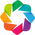

In [44]:
import datashader as ds
import numpy as np
import holoviews as hv
import pandas as pd
import numpy as np

from holoviews import opts
from holoviews.operation.datashader import datashade, rasterize, shade, dynspread, spread
from holoviews.operation.resample import ResampleOperation2D
from holoviews.operation import decimate

hv.extension('bokeh','matplotlib', width=500)

# Default values suitable for this notebook
decimate.max_samples=1000
dynspread.max_px=20
dynspread.threshold=0.5
ResampleOperation2D.width=500
ResampleOperation2D.height=500

def random_walk(n, f=5000):
    """Random walk in a 2D space, smoothed with a filter of length f"""
    xs = np.convolve(np.random.normal(0, 0.1, size=n), np.ones(f)/f).cumsum()
    ys = np.convolve(np.random.normal(0, 0.1, size=n), np.ones(f)/f).cumsum()
    xs += 0.1*np.sin(0.1*np.array(range(n-1+f))) # add wobble on x axis
    xs += np.random.normal(0, 0.005, size=n-1+f) # add measurement noise
    ys += np.random.normal(0, 0.005, size=n-1+f)
    return np.column_stack([xs, ys])

def random_cov():
    """Random covariance for use in generating 2D Gaussian distributions"""
    A = np.random.randn(2,2)
    return np.dot(A, A.T)

def time_series(T = 1, N = 100, mu = 0.1, sigma = 0.1, S0 = 20):  
    """Parameterized noisy time series"""
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) # standard brownian motion
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) # geometric brownian motion
    return S

In [45]:
datashade(hv.Graph((G.view_edge_list(),hv.Nodes(pos))), pixel_ratio=10,line_width=.5).opts(width=800, height=800)

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


KeyboardInterrupt: 